# Overview

A common point of contention between me and my Bay area friends is whether LA or SF is more diverse. I decided to tackle this question by analyzing the food scene in both cities. Using the Yelp API, I analyzed the "categories" section to identify the different ethnic cuisines in each city. Visit www.amyksu.com/ for full article.

## Procedures

First, I used the yelp API to export all of the restaurants in LA and SF based on zip code. Once these were exported as csv files, I read them into the file and dropped all duplicates.

In [1]:
#Import libraries
%matplotlib inline
import pandas as pd 
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read CSV
la = pd.read_csv('businesses-los-angeles.csv')
sf = pd.read_csv('businesses-san-francisco.csv')

Based on the available ethnic cuisines listed in both cities of the "categories" section of Yelp, I re-categorized the restaurants.

**Note**: Because the data exported from Yelp also included businesses other than restaurants, I used the cuisines listed below to filter out businesses that were not restaurants and did not have their ethnic cuisine listed in their categories. In addition, Yelp's API has a limit of 1,000 businesses for each call. As such, if a zip code had more than 1,000 businesses, not all businesses were captured in my data. 

In [2]:
#define cuisines used to filter businesses
cuisines = ['Latin','Afghan','American','Arabian','Armenian','Asian Fusion','Austrian','Basque','Belgian','Brazilian','British','Burmese','Cajun/Creole','Cantonese','Caribbean','Chinese','Colombian','Cuban','Czech','Ethiopian','Egyptian','Filipino','French','German','Greek','Guamanian','Hawaiian','Halal','Haitian','Himalayan/Nepalese','Honduran','Hungarian','Indian','Indonesian','Italian','Irish','Japanese','Korean','Lebanese','Laotian','Malaysian','Mediterranean','Mexican','Middle Eastern','Modern European','Mongolian','Moroccan','Nicaraguan','Pakistani','Persian/Iranian','Peruvian','Polish','Puerto Rican','Russian','Sardinian','Scandinavian','Shanghainese','Singaporean','Spanish','Syrian','Szechuan','Taiwanese','Thai','Turkish','Venezuelan','Vietnamese','Argentine','Australian','African','Bangladeshi','Salvadoran']

#assigning cuisines using categories column
def find_cuisine(categories):
    for category in categories:
        # check if `title` matches any item in `cuisines`
        # if so, then we append matching cuisine to `row`
        for cuisine in cuisines:
            if cuisine in category['title']:
            # get the cuisine and append it.
                return cuisine
    return 'NA'

#use above to assign create a new column with a list of cuisines
for i, row in la.iterrows():
    if row[0] == "id" or "n's" in row[7]:
        continue
    categories = json.loads(row[7].replace("\'", "\""))
    cuisine = find_cuisine(categories)
    la.at[i, 'cuisines'] = cuisine

for i, row in sf.iterrows():
    if row[0] == "id" or "n's" in row[7]:
        continue
    categories = json.loads(row[7].replace("\'", "\""))
    cuisine = find_cuisine(categories)
    sf.at[i, 'cuisines'] = cuisine

la[:25]
sf[:25]

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates_latitude,...,location_address3,location_city,location_zip_code,location_country,location_state,location_display_address,phone,display_phone,distance,cuisines
0,-x6LI9LyWI5zq7ZslszEIA,speakeasy-ales-and-lagers-san-francisco,Speakeasy Ales & Lagers,https://s3-media2.fl.yelpcdn.com/bphoto/DKYJoM...,False,https://www.yelp.com/biz/speakeasy-ales-and-la...,395,"[{'alias': 'breweries', 'title': 'Breweries'},...",4.5,37.7380942813543,...,NaN,San Francisco,94124,US,CA,"['1195 Evans Ave', 'San Francisco, CA 94124']",+14156423371,(415) 642-3371,284.3007255138981,NA
1,10w-2XT7TBlBrK3LbhMt_g,huli-huli-hawaiian-grill-san-francisco-2,Huli Huli Hawaiian Grill,https://s3-media1.fl.yelpcdn.com/bphoto/frxuD2...,False,https://www.yelp.com/biz/huli-huli-hawaiian-gr...,235,"[{'alias': 'hawaiian', 'title': 'Hawaiian'}, {...",4.5,37.74027,...,NaN,San Francisco,94124,US,CA,"['4100 3rd St', 'San Francisco, CA 94124']",+14159701990,(415) 970-1990,556.5277461787035,Hawaiian
2,yjD16DQ2GI1I0c2rmVI8zA,la-laguna-taqueria-san-francisco,La Laguna Taqueria,https://s3-media4.fl.yelpcdn.com/bphoto/3KWHXS...,False,https://www.yelp.com/biz/la-laguna-taqueria-sa...,107,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,37.74185,...,NaN,San Francisco,94124,US,CA,"['3906 3rd St', 'San Francisco, CA 94124']",+14154019420,(415) 401-9420,550.6336065140757,Mexican
3,-8mvLH7dsKaIBCy76kOJgA,vasquez-coffee-company-san-francisco,Vasquez Coffee Company,https://s3-media4.fl.yelpcdn.com/bphoto/Z7zaQ9...,False,https://www.yelp.com/biz/vasquez-coffee-compan...,21,"[{'alias': 'cafes', 'title': 'Cafes'}]",5.0,37.74371,...,NaN,San Francisco,94124,US,CA,"['50 Mendell St', 'San Francisco, CA 94124']",+14158242925,(415) 824-2925,452.8568195577807,NA
4,hdz4Ps4o8CnCH9-svNZllg,soo-fong-restaurant-san-francisco-2,Soo Fong Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/-VH4bQ...,False,https://www.yelp.com/biz/soo-fong-restaurant-s...,81,"[{'alias': 'chinese', 'title': 'Chinese'}]",3.5,37.74158,...,NaN,San Francisco,94124,US,CA,"['3801 3rd St', 'Ste 370', 'San Francisco, CA ...",+14152852828,(415) 285-2828,437.74338123325145,Chinese
5,U6MgJvCbdQEyZPkGVbjD7w,wok-in-cafeteria-san-francisco,Wok-In Cafeteria,https://s3-media1.fl.yelpcdn.com/bphoto/9kQCm4...,False,https://www.yelp.com/biz/wok-in-cafeteria-san-...,43,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,37.743709564209,...,NaN,San Francisco,94124,US,CA,"['50 Mendell St', 'San Francisco, CA 94124']",+14155507200,(415) 550-7200,452.8568195577807,Chinese
6,kIvt2cI59x-hVkoaxJzuMg,javalencia-cafe-san-francisco-4,Javalencia Cafe,https://s3-media4.fl.yelpcdn.com/bphoto/h2V9pz...,False,https://www.yelp.com/biz/javalencia-cafe-san-f...,32,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.0,37.74191,...,NaN,San Francisco,94124,US,CA,"['3900 3rd St', 'San Francisco, CA 94124']",NaN,NaN,547.653281463347,NA
7,V7ezktgmuT4FBz-fevSYwg,sam-jordans-bar-and-grill-san-francisco-3,Sam Jordan's Bar and Grill,https://s3-media2.fl.yelpcdn.com/bphoto/7dW9HE...,False,https://www.yelp.com/biz/sam-jordans-bar-and-g...,39,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.0,37.74106,...,NaN,San Francisco,94124,US,CA,"['4004 3rd St', 'San Francisco, CA 94124']",+14158240155,(415) 824-0155,546.1527594700032,NA
8,hrrydGleIXC5oVkx9d54OQ,tiffanys-cafe-san-francisco,Tiffanys Cafe,https://s3-media3.fl.yelpcdn.com/bphoto/RxSc_s...,False,https://www.yelp.com/biz/tiffanys-cafe-san-fra...,50,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.5,37.74158,...,NaN,San Francisco,94124,US,CA,"['3801 3rd St', 'San Francisco, CA 94124']",+14158241715,(415) 824-1715,437.74338123325145,NA
9,IDxdEIiwY_x5bxE716hSjQ,jeremiahs-pick-coffee-company-san-francisco,Jeremiah's Pick Coffee Company,https://s3-media4.fl.yelpcdn.com/bphoto/qC0jbC...,False,https://www.yelp.com/biz/jeremiahs-pick-coffee...,20,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",3.5,37.7416475,...,NaN,San Francisco,94124,US,CA

Looking at the preview above, there are additional header columns that resulted from combining the data from each zip code. As such, I removed these additional headers as well as businesses with "NA" in the cuisine column to remove businesses that did not have a cuisine listed in the category column.

In [3]:
#to drop additional header rows that resulted from combining multiple files
#removed the headers
la = la[la.id != 'id']
sf = sf[sf.id != 'id']

#To remove businesses other than restaurants, removed NAs from cuisines column 
la = la[la.cuisines != 'NA']
sf = sf[sf.cuisines != 'NA']

#preview
la[:5]
sf[:5]

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates_latitude,...,location_address3,location_city,location_zip_code,location_country,location_state,location_display_address,phone,display_phone,distance,cuisines
1,10w-2XT7TBlBrK3LbhMt_g,huli-huli-hawaiian-grill-san-francisco-2,Huli Huli Hawaiian Grill,https://s3-media1.fl.yelpcdn.com/bphoto/frxuD2...,False,https://www.yelp.com/biz/huli-huli-hawaiian-gr...,235,"[{'alias': 'hawaiian', 'title': 'Hawaiian'}, {...",4.5,37.74027,...,NaN,San Francisco,94124,US,CA,"['4100 3rd St', 'San Francisco, CA 94124']",+14159701990,(415) 970-1990,556.5277461787035,Hawaiian
2,yjD16DQ2GI1I0c2rmVI8zA,la-laguna-taqueria-san-francisco,La Laguna Taqueria,https://s3-media4.fl.yelpcdn.com/bphoto/3KWHXS...,False,https://www.yelp.com/biz/la-laguna-taqueria-sa...,107,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,37.74185,...,NaN,San Francisco,94124,US,CA,"['3906 3rd St', 'San Francisco, CA 94124']",+14154019420,(415) 401-9420,550.6336065140757,Mexican
4,hdz4Ps4o8CnCH9-svNZllg,soo-fong-restaurant-san-francisco-2,Soo Fong Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/-VH4bQ...,False,https://www.yelp.com/biz/soo-fong-restaurant-s...,81,"[{'alias': 'chinese', 'title': 'Chinese'}]",3.5,37.74158,...,NaN,San Francisco,94124,US,CA,"['3801 3rd St', 'Ste 370', 'San Francisco, CA ...",+14152852828,(415) 285-2828,437.74338123325145,Chinese
5,U6MgJvCbdQEyZPkGVbjD7w,wok-in-cafeteria-san-francisco,Wok-In Cafeteria,https://s3-media1.fl.yelpcdn.com/bphoto/9kQCm4...,False,https://www.yelp.com/biz/wok-in-cafeteria-san-...,43,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,37.743709564209,...,NaN,San Francisco,94124,US,CA,"['50 Mendell St', 'San Francisco, CA 94124']",+14155507200,(415) 550-7200,452.8568195577807,Chinese
14,L5czP51Psaj_KkTQw1kSjg,boug-creole-deli-san-francisco-2,BOUG Creole Deli,https://s3-media1.fl.yelpcdn.com/bphoto/vJFqn6...,False,https://www.yelp.com/biz/boug-creole-deli-san-...,2,"[{'alias': 'cajun', 'title': 'Cajun/Creole'}, ...",5.0,37.7402525763834,...,San Francisco,94124,US,CA,"['4100 3rd St', 'San Francisco, CA 94124']",+14157869728,(415) 786-9728,550.1821959444641,NaN,Cajun/Creole


For our reference, I counted the amount of unique cuisines present in both cities.

In [4]:
#amount of unique cuisines in LA
la['cuisines'].nunique()

59

In [5]:
#amount of unique cuisines in SF
sf['cuisines'].nunique()

60

### Distribution of cuisines

Based on this information, San Francisco barely edged out Los Angeles in total number of unqiue cuisines. To understand what this means, I found the distribution of each cuisine in each city. 

In [6]:
#create distribution of each cuisine in each city (cd = cuisine distribution)
la_cd = la['cuisines'].value_counts(ascending = False)
sf_cd = sf['cuisines'].value_counts(ascending = False)

#preview
print(la_cd[:5])
print(sf_cd[:5])

Mexican     2911
American    2669
Korean      2109
Japanese    1480
Italian     1231
Name: cuisines, dtype: int64
American    1794
Mexican      853
Italian      808
Japanese     795
Chinese      786
Name: cuisines, dtype: int64


### Graph of Distribution

To better visualize this information, I created the following bar charts to see the distribution of each cuisine in the two cities. 

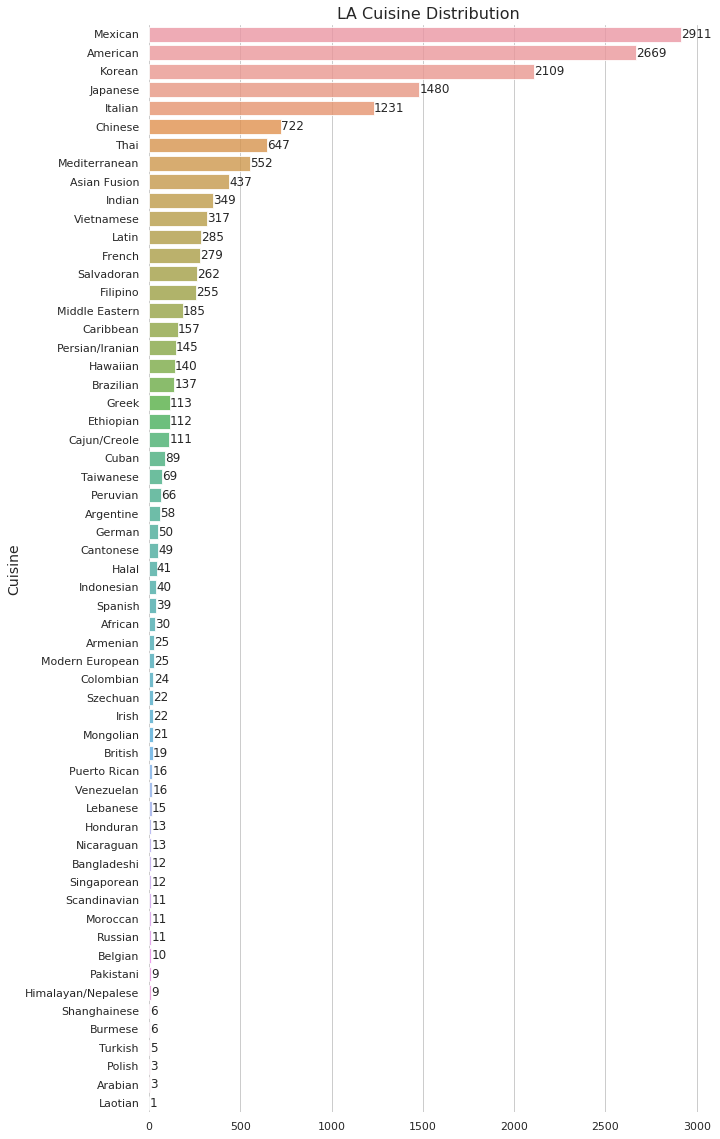

<Figure size 432x288 with 0 Axes>

In [7]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (10,20))
sns.barplot(y = la_cd.index,x = la_cd.values, alpha = 0.8)
plt.title('LA Cuisine Distribution', fontsize = 16)
plt.ylabel('Cuisine', fontsize = 14)
sns.despine(left=True,bottom=True)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1.5,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:1.0f}'.format(width),
            ha="left")

plt.show()
plt.savefig('la_cuisine_dist.png')

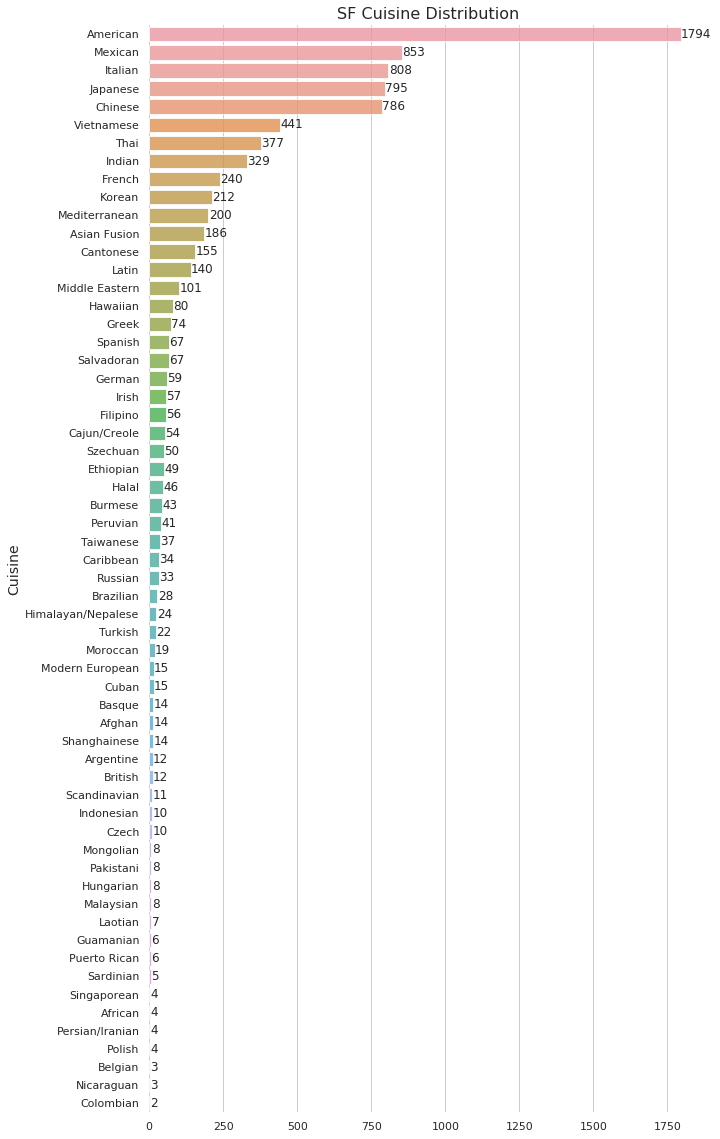

<Figure size 432x288 with 0 Axes>

In [8]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (10,20))
sns.barplot(y = sf_cd.index,x = sf_cd.values, alpha = 0.8)
plt.title('SF Cuisine Distribution', fontsize = 16)
plt.ylabel('Cuisine', fontsize = 14)
sns.despine(left=True,bottom=True)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1.5,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:1.0f}'.format(width),
            ha="left")

plt.show()
plt.savefig('sf_cuisine_dist.png')

To make it easier to perform calculations with the information above, I converted each frequency table to a dataframe. In addition, to see how many restaurants are in each city, I summed the total distribution to find this information.

In [10]:
#converting frequency table to dataframe
la_dist = la_cd.to_frame('count')
sf_dist = sf_cd.to_frame('count')

#finding total amount of restaurants in data
la_total = la_dist['count'].sum()
la_total

16476

In [11]:
sf_total = sf_dist['count'].sum()
sf_total

8564

## Diversity Index

The USA Today Diversity Index is a number - on a scale from 0 to 10 - that represents the chance that two people chosen randomly from an area will be different by race and ethnicity. A higher number means more diversity, a lower number, mean less. For my project, I will be using this definition to determine the diversity index based on local ethnic cuisine for both LA and SF. 

To calculate the diversity index: 

1. For each race, calculate its percentage frequency in the area, with the "other race" category removed from the base. This has the same effect as assigning "other race" to the population in proportion to the presence of the officially designated categories. 
2. Convert the percentage to a decimal and treat it as the probability that one person (or in our case, restaurant) at random will be of that race.
      - Probability per race = race/total number
3. Square the percentage. The probability that two people (or restaurants) chosen at random will be of that particular race is the single probability multiplied by itself (squared).
      - probability per race = (race/total number or population)^2
4. Sum the squared probabilities for the separate races. This is the probability that two people are of the same race. 

#### Note 
In the original USA Today diversity index calculation, only 5 races (White, Black, American Indian, Asianas well a Hispanic and non-Hispanic category were used to calculate the diversity index. 

In my calculation, I will be treating each cuisine found as a different race.

### Calculating Diversity Index

In order to calculate this, I created the following function:

In [12]:
def diversity_index(list_of_count):
      diversity_idx = 0
      total_probability = 0 
      total = list_of_count.sum()
      for count in list_of_count:
        probability = (count/total) ** 2 
        total_probability += probability 
      diversity_idx = 1 - total_probability 
      return diversity_idx
    
# find diversity index (diversity_idx) of la

la_diversity_idx = diversity_index(la_cd)
la_diversity_idx

0.90461041098218975

In [13]:
# find diversity index (diversity_idx) of la
sf_diversity_idx = diversity_index(sf_cd)
sf_diversity_idx

0.91032866036443794

## Diversity Index Results

Based on our diversity indeces, **San Francisco has a slightly larger diversity index than Los Angeles that would suggest that the restaurant scene in San Francisco is more diverse than Los Angeles.** However, this information seems to be skewed by the fact that San Francisco has one more type of cuisine than Los Angeles. In addition, when we look at the charts above, you can see that the distribution of cuisines in SF are not as evenly distributed as LA. There are much more American restaurants than there are any other cuisine. Whereas in LA, the top 3 cuisines are fairly well distributed. 

### More Graphs
To further understand this relationship, I created a pie chart to represent the total percentage of each cuisine in each of the cities. I created a new “Other” category for any cuisines under 1%:

In [14]:
#To create the "Other" category, used mask and np.where
series = la['cuisines'].value_counts(ascending = False)
mask = (series/series.sum() * 100).lt(1)
la['cuisines'] = np.where(la['cuisines'].isin(series[mask].index),'Other',la['cuisines'])
new = series[~mask]
new['Other'] = series[mask].sum()

To confirm the above worked, printed out the frequency table with the new category.

In [15]:
new = la['cuisines'].value_counts(ascending=False, normalize = True) * 100
la_percentage = new.to_frame('Percentage')
la_percentage

,Percentage
Mexican,17.668123
American,16.199320
Korean,12.800437
Other,10.840010
Japanese,8.982763
Italian,7.471474
Chinese,4.382132
Thai,3.926924
Mediterranean,3.350328
Asian Fusion,2.652343


I did the same process for SF.

In [16]:
series = sf['cuisines'].value_counts(ascending = False)
mask = (series/series.sum() * 100).lt(1)
sf['cuisines'] = np.where(sf['cuisines'].isin(series[mask].index),'Other',sf['cuisines'])
new = series[~mask]
new['Other'] = series[mask].sum()

In [17]:
new = sf['cuisines'].value_counts(ascending=False, normalize = True) * 100
sf_percentage = new.to_frame('Percentage')
sf_percentage

,Percentage
American,20.948155
Other,13.393274
Mexican,9.960299
Italian,9.434844
Japanese,9.283045
Chinese,9.177954
Vietnamese,5.149463
Thai,4.402149
Indian,3.841663
French,2.802429


Using the new frequency tables, I created a pie chart to better visualize how each cuisine makes up the food scene within each city.

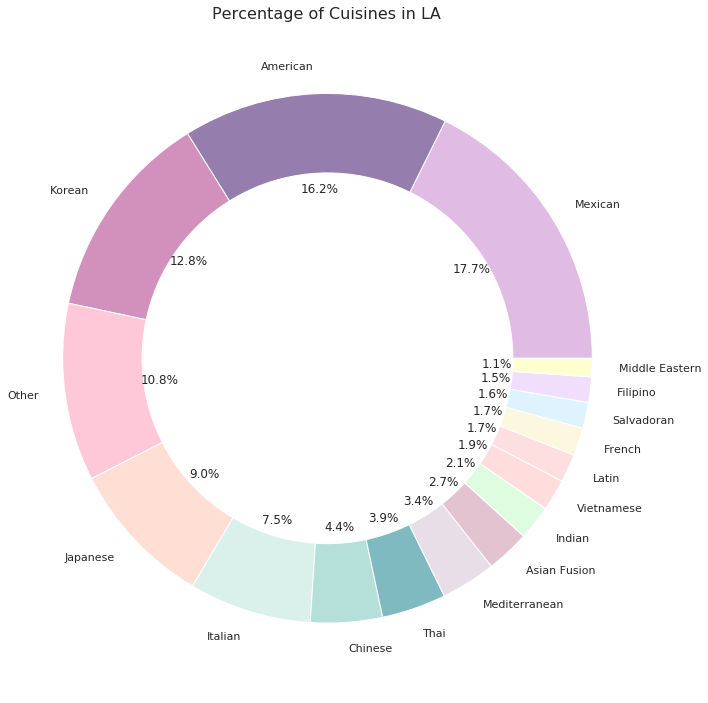

<Figure size 432x288 with 0 Axes>

In [18]:
colors = ['#E0BBE4','#957DAD','#D291BC','#FEC8D8','#FFDFD3',
          '#D9F0EB','#B5E0D9','#7FBAC0','#E8DEE8','#E3C3D0',
         '#DEFDE0','#FFDDDD','#FDDFDF','#FCF7DE','#DEF3FD',
         '#F0DEFD','#FFFFCF','#D9FFDF','#D9FFFF']
labels = ['Mexican','American','Korean','Other','Japanese','Italian','Chinese','Thai',
         'Mediterranean','Asian Fusion','Indian','Vietnamese','Latin','French','Salvadoran',
          'Filipino','Middle Eastern']
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(la_percentage, colors = colors, labels = labels, autopct = '%.1f%%',
       pctdistance = 0.64)
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax1.axis('equal')
plt.title('Percentage of Cuisines in LA', fontsize = 16)
plt.tight_layout()
plt.show()
plt.savefig('lapie.png')

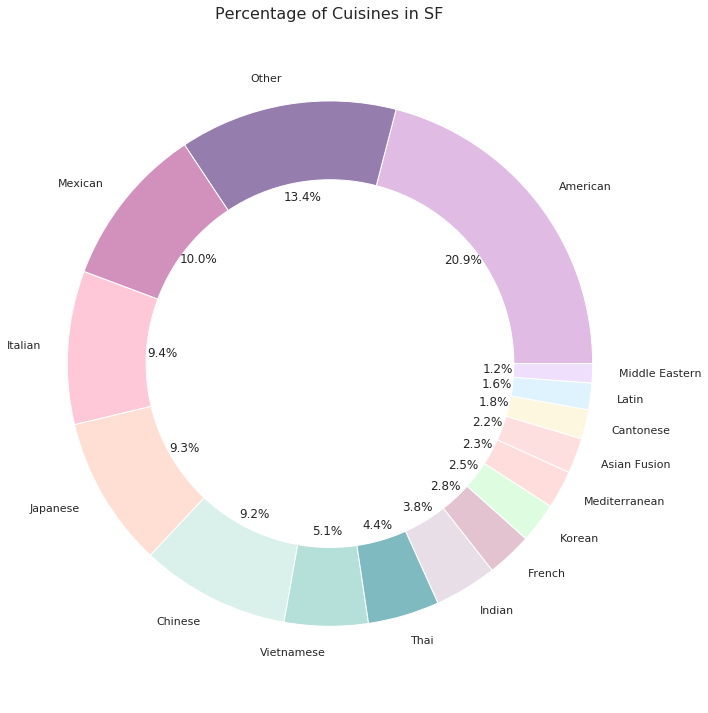

<Figure size 432x288 with 0 Axes>

In [19]:
colors = ['#E0BBE4','#957DAD','#D291BC','#FEC8D8','#FFDFD3',
          '#D9F0EB','#B5E0D9','#7FBAC0','#E8DEE8','#E3C3D0',
         '#DEFDE0','#FFDDDD','#FDDFDF','#FCF7DE','#DEF3FD',
         '#F0DEFD','#FFFFCF','#D9FFDF','#D9FFFF']
labels = ['American','Other','Mexican','Italian','Japanese','Chinese','Vietnamese','Thai','Indian','French','Korean',
         'Mediterranean','Asian Fusion','Cantonese','Latin','Middle Eastern']
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sf_percentage, colors = colors, labels = labels, autopct = '%.1f%%',pctdistance = 0.64)
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax1.axis('equal')
plt.tight_layout()
plt.title('Percentage of Cuisines in SF', fontsize = 16)
plt.show()
plt.savefig('sfp.png')

As shown above, almost a quarter of the restaurants in SF are American. In contrast, the top three cuisines in LA, Mexican, American, and Korean, make up a little less than half of the restaurant scene. In addition, with the creation of the “Other” category, the combination of all the cuisines that made up less than 1% of the distribution accumulated to a fairly large amount of the complete food scene. Also, worth noting, in comparing the categories after the combination, LA had greater diversity of cuisines, 17 including “Other”, than SF, 16 including “Other”. This supports my idea that though SF technically has more types of cuisines, LA has a more evenly distributed food scene that is not overly saturated by just one cuisine. 

# Conclusion

From the data and my calculations, I found the following: 
    
    
  - Based on the USA Today Diversity Index, SF’s food scene is more diverse than LA’s food scene. 
    - This slight difference can be attributed to the fact that SF has 60 unique ethnic cuisines as opposed to LA which has 59.
  - Almost a quarter of SF’s food scene (20.9%) is made up of American restaurants. 
  - The top 3 cuisines in LA, Mexican, American, and Korean, make up a little less than half of LA’s restaurant scene at 17.7%, 16.2%, and 12.8%, respectively. 
  - After combining cuisines that made up less than 1% of the distribution, LA had a greater diversity of cuisines, 17 include ‘Other’, while SF had 16 including “Other”. 

This brings to question, what really is diversity? Is it having the most amount of different and unique cuisines? Or is it having a more evenly distributed food scene that is made up of multiple unique ethnic cuisines. Though LA is made up mostly of 3 cuisines, LA also has a greater percentage of diverse cuisines that make up more than 1% of the food scene, which in my opinion, means that LA has a slightly more diverse restaurant scene, but that could also be my bias talking. 

As with everything in life, what I have found is up to interpretation, but, based on my original method of determination, the Diversity Index, **SF is more diverse**. 

## Notes and Limitations

Because my project was limited in scope and information, this is just a sample of a full population that could be studied between SF and LA. With more information, it would be interesting to see how the distribution of each cuisine across a map of LA and SF and how that reflects the neighborhoods within each city. I would have also liked to have used Census data to compare the diversity of both LA and SF to see if the food diversity is an accurate reflection of the actual cities’ population diversity as well. 

Other interesting things I wish I could have done: 

  - An analysis of the food scene over time. Has SF/LA gotten more or less diverse over time?
  - An analysis on food price. What is the distribution of restaurants at different price points and what does that say about the people who frequent those places? What is the difference of these distributions in both SF and LA and what does this mean about the two cities? 
  - Was the Diversity Index really the best method? Sure I did my research, but I would maybe have tried a different approach to determining my question such as a chi-squared test. 